In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
df = pd.read_csv('auto_mpg_new.csv')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,Japan
1,15.0,8,350.0,165.0,3693.0,11.5,70,Japan
2,18.0,8,318.0,150.0,3436.0,11.0,70,Japan
3,16.0,8,304.0,150.0,3433.0,12.0,70,Japan
4,17.0,8,302.0,140.0,3449.0,10.5,70,Japan


In [3]:
df = df.rename(columns={'Model Year': 'Model_Year'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [5]:
df['Horsepower'].isna().sum()

6

In [6]:
df['Horsepower']


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: Horsepower, Length: 398, dtype: float64

In [7]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())

In [8]:
df['Horsepower'].isna().sum()

0

In [9]:
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,Japan
1,15.0,8,350.0,165.0,3693.0,11.5,70,Japan
2,18.0,8,318.0,150.0,3436.0,11.0,70,Japan
3,16.0,8,304.0,150.0,3433.0,12.0,70,Japan
4,17.0,8,302.0,140.0,3449.0,10.5,70,Japan
5,15.0,8,429.0,198.0,4341.0,10.0,70,Japan
6,14.0,8,454.0,220.0,4354.0,9.0,70,Japan
7,14.0,8,440.0,215.0,4312.0,8.5,70,Japan
8,14.0,8,455.0,225.0,4425.0,10.0,70,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,Japan


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [11]:
df = pd.get_dummies(df,columns=['Origin'],dtype=int)

In [12]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin_Germany,Origin_Japan,Origin_USA
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.442174,-0.568192,0.259022
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.396479,0.604351,-0.352861
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.433505,0.651407,-0.373886
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.318972,0.485418,-0.282877
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.440817,0.598398,-0.298843
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.109144,-0.250806,0.204473
Model_Year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.193101,-0.139883,-0.024489
Origin_Germany,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,1.000000,-0.643317,-0.229895
Origin_Japan,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,-0.643317,1.000000,-0.597198
Origin_USA,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.229895,-0.597198,1.000000


<Axes: >

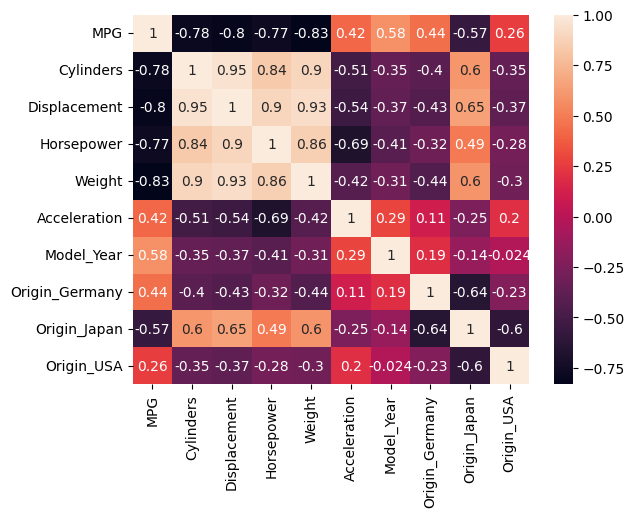

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
x = df.drop('MPG',axis=1)
y= df['MPG']

In [15]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list, index = x.columns)
vif_values

Cylinders          10.696878
Displacement       23.005113
Horsepower          9.476081
Weight             10.804647
Acceleration        2.553992
Model_Year          1.290936
Origin_Germany    153.305041
Origin_Japan      483.249651
Origin_USA        131.904827
dtype: float64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=35)

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
lin_reg.coef_

array([-0.43647827,  0.02804073, -0.02970627, -0.00704761, -0.00595973,
        0.75386142,  0.92222317, -1.84406081,  0.92183763])

In [20]:
lin_reg.intercept_

-11.921174472847277

In [21]:
y_pred = lin_reg.predict(x_test)
y_pred

array([19.57349599, 28.73207802, 30.8050256 , 23.72664596, 24.268817  ,
       10.59761812, 23.84679408, 12.09734017, 21.14179149, 16.89368803,
        4.84477653, 18.21545932, 23.883927  , 31.89944892, 18.17251111,
       13.56290023, 22.77901632, 11.95239037, 27.38652294, 28.64245214,
       28.01027554, 13.58561757, 26.19356367,  9.94237774,  8.91386395,
       20.09166339, 26.63264383, 26.36339128, 27.00941588, 24.86420673,
       27.14744373, 31.94485537, 20.54127509, 35.47663396, 21.86025931,
       17.03030488, 29.84560317, 16.85414117, 20.81614002, 34.4210483 ,
       29.32658627, 11.74069094, 24.13523824, 35.0885981 , 22.39599776,
       29.75525053, 23.15011762, 29.32533677, 14.81159005, 27.24241428,
       29.46369833, 32.01726563, 28.15288709, 22.71598967, 26.00507424,
       16.13323176, 17.95021612, 22.65427365, 10.97260152, 25.77481123,
       16.03254928, 19.90072157, 25.50035201,  6.6129084 , 12.20811878,
       28.62226506, 26.30585437, 28.10000702, 30.92464684, 21.25

In [22]:
residual = y_test - y_pred
residual

153   -1.573496
266    1.267922
358    0.794974
363   -1.326646
82    -1.268817
         ...   
99    -3.332042
87    -2.098334
120   -3.047546
80    -0.658728
67     0.845592
Name: MPG, Length: 80, dtype: float64

In [23]:
lin_reg.score(x_test, y_test)

0.8458916640259687

In [24]:
row=x.iloc[10:11]
row

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin_Germany,Origin_Japan,Origin_USA
10,8,383.0,170.0,3563.0,10.0,70,0,1,0


In [25]:
lin_reg.predict(row)

array([16.03254928])

In [26]:
columns_name=x.columns.to_list()
columns_name

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model_Year',
 'Origin_Germany',
 'Origin_Japan',
 'Origin_USA']

In [27]:
Cylinders=8
Displacement=383.0
Horsepower=170.0
Weight=3563.0
Acceleration=10
Model_Year=70
Origin='Japan'

In [28]:
Cylinders=8
Displacement=383.0
Horsepower=170.0
Weight=3563.0
Acceleration=10
Model_Year=70
Origin='Origin_'+ Origin

In [29]:
mpg_index = columns_name.index(Origin)
mpg_index

7

In [30]:
test_array = np.zeros([1,x.shape[1]])
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
test_array[0,0] = Cylinders
test_array[0,1] = Displacement
test_array[0,2] = Horsepower
test_array[0,3] = Weight
test_array[0,4] = Acceleration
test_array[0,5] = Model_Year
test_array[0,mpg_index] = 1

In [32]:
import pickle
import json

In [33]:
with open ('mpg_model.pkl', 'wb') as f:
    pickle.dump(lin_reg,f)

In [34]:
project_data = {"Column Names" : columns_name}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)